In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/aman/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [41]:
feat = pd.read_csv('../data/Paticlulate Composite.csv', header = None)

In [45]:
stress = pd.read_csv('../data/Stress Data 1 Extended (100X100).dat',delim_whitespace=True,header=None)

In [46]:
strain = pd.read_csv('../data/Strain Data 1 (1X100).dat', delim_whitespace=True, header = None)

In [47]:
strain = pd.DataFrame(strain.values.reshape(100,1))

In [48]:
stress = pd.DataFrame(stress.values.reshape(10000,1))

In [42]:
feat['merge_on'] = feat.index

In [50]:
strain['merge_on'] = strain.index

In [51]:
stress['merge_on'] = stress.index

In [52]:
stress['merge_on'] = stress['merge_on']/100

In [53]:
stress['merge_on'] = stress['merge_on'].astype(int)

In [54]:
stress.columns = ['stress', u'merge_on']

In [55]:
strain.columns = ['strain', u'merge_on']

In [56]:
# stress

In [57]:
master = pd.merge(stress, feat, on = 'merge_on', how = 'left')

In [58]:
master['merge_on'] = stress.index%100

In [59]:
master = pd.merge(master, strain, on = 'merge_on', how = 'left')

In [60]:
master = master.drop('merge_on', axis = 1)

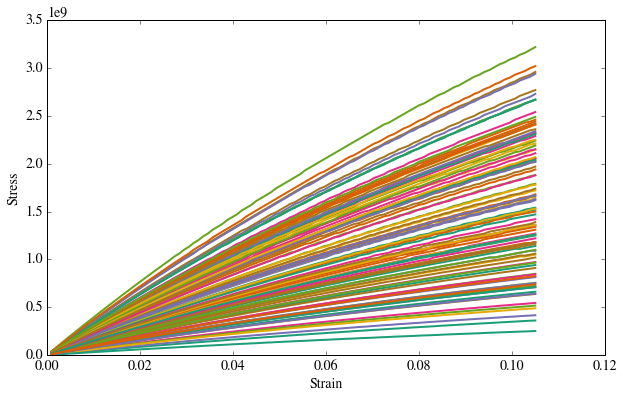

In [61]:
for i in range(100):
    plt.plot(master.iloc[i*100:i*100+100]['strain'],master.iloc[i*100:i*100+100]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
#plt.plot(master.iloc[:100]['strain'],master.iloc[:100]['stress'])

In [65]:
features = master[[0, 1, 2, 3, u'strain']]
target = master['stress']

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

lm = LinearRegression()
np.mean(cross_val_score(lm, features, target, cv = 5))

0.87565940478776239

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
print np.mean(cross_val_score(rf, features, target.values.ravel(), cv=10, scoring='r2'))

0.977610073944
